In [1]:
import pandas as pd
import numpy as np

In [2]:
bank=pd.read_csv('/Users/boris/Desktop/bank-additional.csv',delimiter=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank.dropna(axis=0,subset=['y'],inplace=True)
bank.drop(['contact','duration', 'nr.employed'], axis=1, inplace=True)
mean_campaign=np.mean(bank.campaign.dropna())
bank.campaign.fillna(round(mean_campaign), inplace=True)
bank['cons.price.idx'].fillna(np.mean(bank['cons.price.idx'].dropna()), inplace=True)
bank['cons.conf.idx'].fillna(np.mean(bank['cons.conf.idx'].dropna()), inplace=True)
bank['euribor3m'].fillna(np.mean(bank['euribor3m'].dropna()), inplace=True)
bank['contacted'] = np.where(bank['pdays']==999, 0, 1)
bank.drop(['pdays','previous', 'poutcome','emp.var.rate'], axis=1, inplace=True)
dummies=pd.get_dummies(bank[['housing', 'loan']])
bank['y'] = np.where(bank['y']=='no', 0, 1)
bank_prepared=bank.join(dummies)
numerical=bank_prepared.select_dtypes(exclude=['object'])
numerical.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0


In [21]:
import seaborn as sb
sb.set(rc={'figure.figsize':(20,15)})
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
help(sb.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

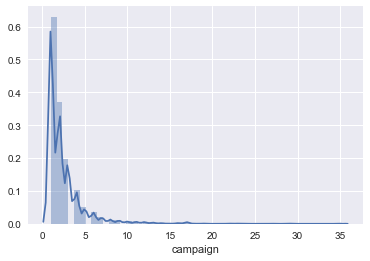

In [23]:
sb.distplot(numerical['campaign'])
sb.despine(trim=True)

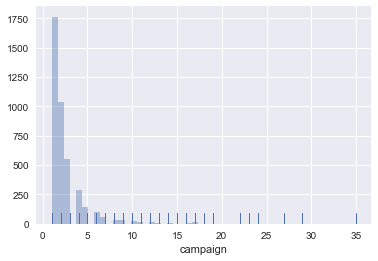

In [7]:
sb.distplot(numerical['campaign'], norm_hist=False, kde=False, rug=True) #kernel density estimation = False

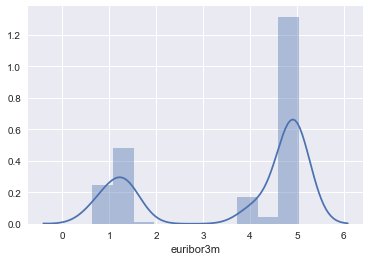

In [18]:
sb.distplot(numerical['euribor3m'])
sb.despine(trim=True)

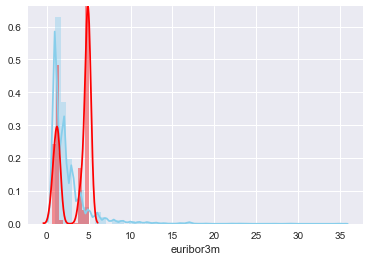

In [9]:
sb.distplot( numerical["campaign"] , color="skyblue", label="campaign")
sb.distplot( numerical["euribor3m"] , color="red", label="euribor3m")
#sb.distplot( numerical["campaign"] , color="skyblue", label="campaign", norm_hist=False, kde=False)
#sb.distplot( numerical["euribor3m"] , color="red", label="euribor3m", norm_hist=False, kde=False)

In [10]:
numerical.corr()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
age,1.000000,-0.013902,-0.000472,0.098143,-0.015193,0.060313,0.043319,0.008884,-0.009282,-0.005916,0.009661,-0.009282,-0.006259
campaign,-0.013902,1.000000,0.144973,0.007039,0.159381,-0.075803,-0.058551,0.017258,0.001129,-0.017542,0.022354,0.001129,-0.024172
cons.price.idx,-0.000472,0.144973,1.000000,0.045255,0.656554,-0.098354,-0.058166,0.087818,0.015386,-0.092308,0.010190,0.015386,-0.017393
cons.conf.idx,0.098143,0.007039,0.045255,1.000000,0.275943,0.054216,0.091859,0.027481,0.010174,-0.030578,-0.006459,0.010174,0.002484
euribor3m,-0.015193,0.159381,0.656554,0.275943,1.000000,-0.298667,-0.301618,0.051006,0.011447,-0.054406,-0.011539,0.011447,0.007321
y,0.060313,-0.075803,-0.098354,0.054216,-0.298667,1.000000,0.331877,0.001101,-0.012330,0.002797,0.014407,-0.012330,-0.009982
contacted,0.043319,-0.058551,-0.058166,0.091859,-0.301618,0.331877,1.000000,-0.021267,-0.000635,0.021379,0.006058,-0.000635,-0.006147
housing_no,0.008884,0.017258,0.087818,0.027481,0.051006,0.001101,-0.021267,1.000000,-0.145233,-0.949945,0.111850,-0.145233,-0.056274
housing_unknown,-0.009282,0.001129,0.015386,0.010174,0.011447,-0.012330,-0.000635,-0.145233,1.000000,-0.171141,-0.337563,1.000000,-0.070922
housing_yes,-0.005916,-0.017542,-0.092308,-0.030578,-0.054406,0.002797,0.021379,-0.949945,-0.171141,1.000000,-0.004791,-0.171141,0.078433


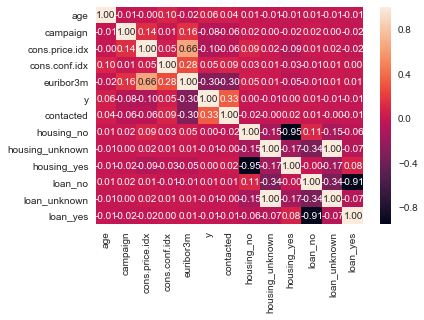

In [11]:
sb.heatmap(numerical.corr(), annot=True, fmt=".2f")

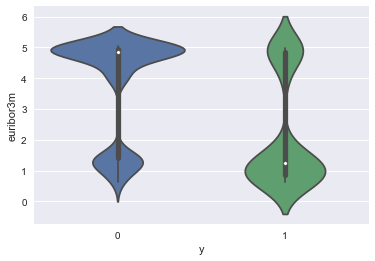

In [24]:
sb.violinplot(x='y', y='euribor3m', data=numerical)

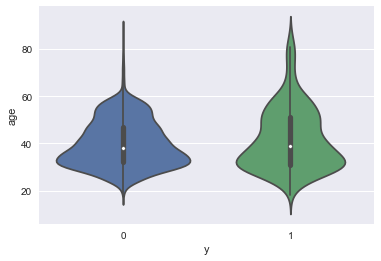

In [13]:
sb.violinplot(x='y', y='age', data=numerical)

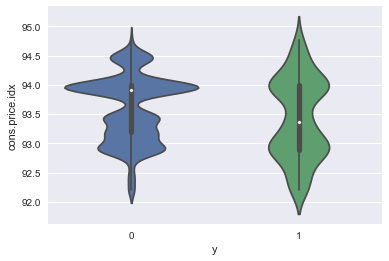

In [26]:
sb.violinplot(x='y', y='cons.price.idx', data=numerical) 

[Text(0.5,0,'')]

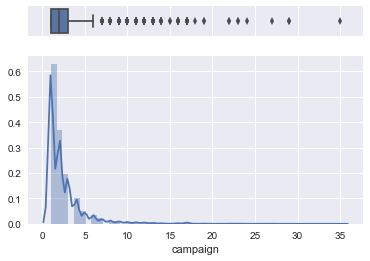

In [15]:
import matplotlib.pyplot as plt
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sb.boxplot(numerical["campaign"], ax=ax_box)
sb.distplot(numerical["campaign"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')